## Enoncé 


Nous allons utiliser un jeu de données décrivant des chiffres écrits à la main

👉 Le jeu de données :
- contient des chiffres écrits à la main 
- contient des chiffres labellisés 
    
👉 Objectif :
- Etre capable de reconnaitre un chiffre écrit 

## Setup 💻

Importer les librairies 

In [84]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

## C'est parti 💪

## 1. Import des données 

Scikit learn embarque dans la librairie des jeux de données. Cela permet à tout de le monde de les utiliser pour s'entrainer.   

Pour commencer on importe le jeu de données. 

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

Comme dans le jeu de donnée précédent, nous retrouvons la structure suivante : 

`data` contient les variables explicatives  
`target` contient la variable expliquée  
`target_names` contient le nom des varibles expliquées     
`images` contient les images   
`DESCR` contient la description du jeu de données  

## 2. Exploration des données 

**Utilisez la fonction `shape` pour comprendre comment sont structurées les variables explicatives et la variable expliquée** 

In [106]:
# Votre code ici

<details><summary>Solution</summary>

```python 
digits.data.shape
```
</details>

In [40]:
# Votre code ici

(1797,)

<details><summary>Solution</summary>

```python 
digits.target.shape
```
</details>

La donnée est constituée de 1797 tableaux de 64 valeurs.  

Chaque tableau représente une image et les 64 valeurs représente les pixels de cette image 

**Affichez le premier tableau de `digits.data`**

In [107]:
# Votre code ici

<details><summary>Solution</summary>

```python 
digits.data[0]
```
</details>

💡 Ce tableau représente une image de 64 pixels

Plus une valeur est proche de 0, plus cela représente le noir   
Plus une valeur est proche de 1, plus cela représente le blanc

Nous venons de convertir un problème de reconnaissance d'image en un problème mathématique 

**Redimensionnez le tableau initial**

Afin d'afficher le l'image nous devons d'abord la transformer en 2 dimensions. Avec 8 pixels sur 8 pixels. 

Voici un exemple d'une image de 9 pixels : 
```python 
image = [1, 2, 3, 4, 5, 6, 7, 8, 9]
```
Nous devons la transformer en 
```python 
image = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]
```


[Numpy](https://numpy.org/) est une librairie en python qui permet de faire cela très facilement. 

👉Lisez la documentation de [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) et transformer le tableau initial de 64 pixels en 8 tableaux de 8 pixels

In [110]:
# Votre code ici

<details><summary>Solution</summary>

```python 
np.reshape(digits.data[0], (8,8))
```
</details>

**Affichez l'image avec matplotlib** 

Afin d'afficher de la donnée sous forme d'image, matplotlib propose une fonction [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

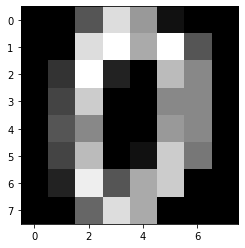

In [114]:
plt.imshow(np.reshape(digits.data[0], (8,8)), cmap=plt.cm.gray)

<details><summary>Astuce</summary>

Vous pouvez donner une palette de couleur à matplotlib en ajoutant le paramêtre `cmap=plt.cm.gray`
</details>

<details><summary>Solution</summary>

```python 
plt.imshow(np.reshape(digits.data[0], (8,8)), cmap=plt.cm.gray)
```
</details>

**Affichez les 5 premières images du jeu de données:**

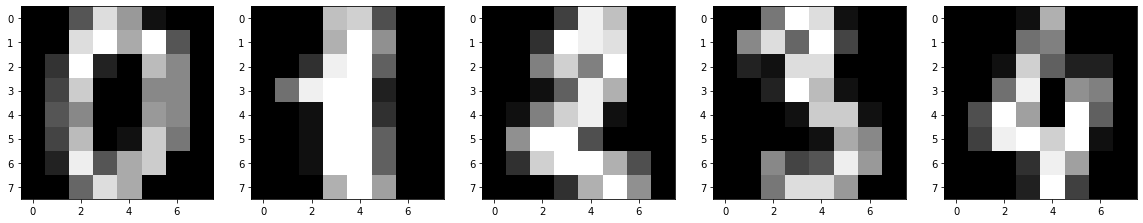

In [119]:
# Votre code ici

<details><summary>Solution</summary>

```python 
plt.figure(figsize=(20,4))
images = digits.data[0:5]
for index, image in enumerate(images):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

```
</details>

## 3. Modélisation 

**Générez un jeu d'apprentissage et un jeu d'entrainement** 

Souvenez-vous nous avions vu deux structures pour `test_train_split`. Vous pouvez passer en argument deux tableaux de même taille. Cela se prête assez bien à la structure du dataset avec `digits.data` et `digits.targets`

Générez un jeu de donnée de test qui fait 30% de la taille totale 

In [120]:
# Votre code ici

<details><summary>Solution</summary>

```python 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.30, random_state=1)
```
</details>

**Entrainez une régression logistique sur les jeux de données d'apprentissage** 

⚠️ Si vous avez un message d'erreur, c'est normal. Le jeu de données `digits` incorporé par défaut dans scikit learn est trop petit. Un autre jeu de données plus conséquent s'appelle [MNIST](https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_MNIST)

In [121]:
# Votre code ici

<details><summary>Solution</summary>

```python 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
```
</details>

### 4. Evaluation du modèle 

**Analysez la performance du modèle sur le jeu d'apprentissage** 

In [122]:
# Votre code ici

<details><summary>Solution</summary>

```python 
model.score(X_train, y_train)
```
</details>

**Analysez la performance du modèle sur le jeu de test** 

In [124]:
# Votre code ici

<details><summary>Solution</summary>

```python 
model.score(X_test, y_test)
```
</details>

## 5. Prédiction

**Affichez la première image du jeu de test et prédisez avec notre modèle entrainé sa valeur**

In [125]:
# Votre code ici 

<details><summary>Solution</summary>

```python 
plt.imshow(np.reshape(X_test[0], (8,8)), cmap=plt.cm.gray)
```
</details>

In [126]:
# Votre code ici 

<details><summary>Solution</summary>

```python 
model.predict([X_test[0]])
```
</details>

## Pour aller plus loin 

### La matrice de confusion 

Une matrice de confusion est souvent utilisée pour évaluer la performance d'une classification. 

👉[matrice de confusion](https://fr.wikipedia.org/wiki/Matrice_de_confusion)

Faire des prévisions sur tout le jeu de données de test

In [100]:
predictions = model.predict(X_test)

Utilisation du module métrics de scikit learn pour générer une matrice de confusion. 

In [128]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[59  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  1  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  1 61  0  0  0  1  1  0]
 [ 0  1  0  0 60  0  0  0  0  0]
 [ 0  1  1  1  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 54  0  1]
 [ 0  0  1  0  0  1  0  0 44  0]
 [ 0  1  0  0  0  1  0  0  1 54]]


Cette matrice n'est pas très bien présentée. On peut utiliser `seaborn` pour présenter les choses d'une manière plus élégante

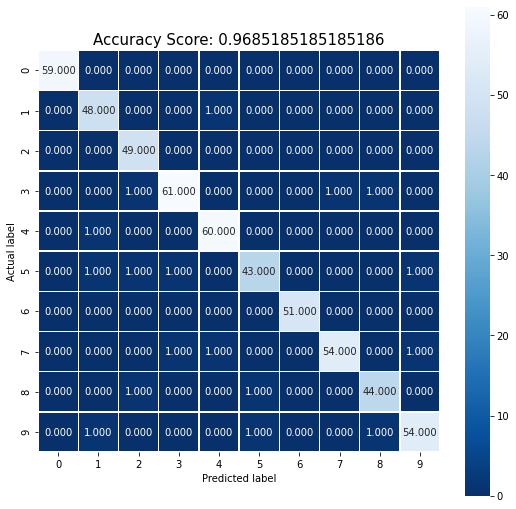

In [130]:
score = model.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

D'après cette matrice, on comprend que :

- un 8 a été pris pour un 2 
- un 8 a été pris pour un 5 

